In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.neural_network

import utils

In [2]:
def load_dataset_up_down(size, seed=39):
    np.random.seed(seed)
    x = np.random.poisson(5, size) * (np.random.randint(0,2, size) * 2 - 1)
    y = (np.random.poisson(5, size) + 1) * (np.random.randint(0,2, size) * 2 - 1)
    X = np.array(list(zip(x,y)))
    Y = (X[:,1] > 0).astype(np.int8)
    return X, Y

# SVMs

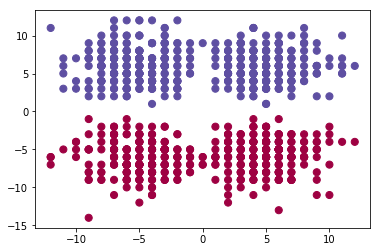

In [3]:
X, Y = load_dataset_up_down(1000)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap=plt.cm.Spectral);

y = -0.0037 * x + 0.0110


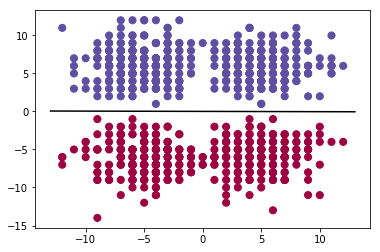

In [4]:
clf = sklearn.svm.LinearSVC()
clf.fit(X, Y)

w = clf.coef_[0]
a = -w[0] / w[1]
b = - clf.intercept_[0] / w[1]
xx = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
yy = a * xx + b

plt.plot(xx, yy, 'k-', label="non weighted div")
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap=plt.cm.Spectral);
print (("y = %.4f * x + %.4f") % (a, b))

In [5]:
clf.coef_

array([[0.0034558 , 0.92689897]])

### In the perceptron demo, we added some extra points and the accuracy decreased... what would happen now?

Accuracy: 100 


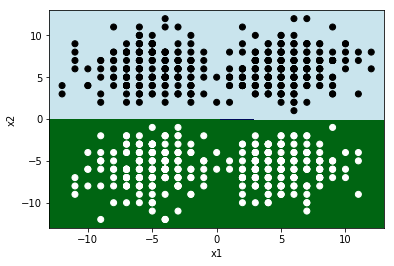

In [6]:
X, Y = load_dataset_up_down(800)
utils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))

### Now, what if the training data have some noise now?

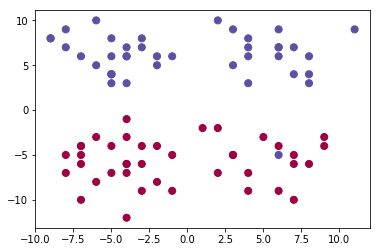

In [7]:
X, Y = load_dataset_up_down(80, 1)
some_noise = np.random.binomial(1, .03, Y.shape[0])
Y = np.logical_xor(Y, some_noise).astype(np.int8)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap=plt.cm.Spectral);

### Adjust the parameter C

Accuracy: 98 


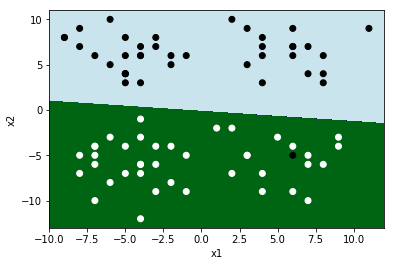

In [8]:
clf = sklearn.svm.LinearSVC(C=0.1)
clf.fit(X, Y);

utils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)
predictions = clf.predict(X)
print ('Accuracy: %d ' % ((np.sum(Y == predictions))/float(Y.size)*100))